In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import cv2
import random
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from sklearn.neighbors import NearestNeighbors
import copy
# from mpl_toolkits.mplot3d import Axes
from sklearn.metrics.pairwise import euclidean_distances


### Read Gaussian Dataset

In [34]:
mat = loadmat('gaussian.mat')  # load mat-file
mdata = mat['data']
df_gaussian = pd.DataFrame(mdata)
df_gaussian = (df_gaussian - df_gaussian.min()) / (df_gaussian.max() - df_gaussian.min())
df_gaussian

,0,1
0,0.229078,0.889672
1,0.150356,0.565184
2,0.316992,0.680032
3,0.106285,0.334825
4,0.361934,0.728777
...,...,...
1995,0.321446,0.608891
1996,0.346788,0.645554
1997,0.237562,0.329869
1998,0.654625,0.200144


In [35]:
print('the shape of gaussian dataframe',df_gaussian.shape)

the shape of gaussian dataframe (2000, 2)


In [36]:
df_gaussian.isnull().sum()

0    0
1    0
dtype: int64

In [37]:
y_gauss = mat['label']

### Read Thyroid Dataset

In [38]:
df_thyroid = pd.read_csv(r'C:\Users\ftmta\Desktop\big_final\thyroid+disease\new-thyroid.data',header =None)

In [39]:
print('the shape of gaussian dataframe',df_thyroid.shape)

the shape of gaussian dataframe (215, 6)


In [40]:
X_th = df_thyroid.drop(df_thyroid.columns[0], axis=1)
y_th = df_thyroid[0]

In [41]:
X_th = (X_th - X_th.min()) / (X_th.max() - X_th.min())

In [42]:
X_th

,1,2,3,4,5
0,0.531646,0.387097,0.204082,0.014210,0.059649
1,0.607595,0.379032,0.295918,0.033748,0.115789
2,0.784810,0.500000,0.224490,0.023091,0.022807
3,0.556962,0.193548,0.142857,0.023091,0.038596
4,0.506329,0.274194,0.132653,0.024867,0.010526
...,...,...,...,...,...
210,0.670886,0.241935,0.112245,0.028419,0.214035
211,0.936709,0.149194,0.051020,0.074600,0.122807
212,0.481013,0.185484,0.122449,0.019538,0.100000
213,0.405063,0.169355,0.091837,0.035524,0.233333


In [43]:
y_th

0      1
1      1
2      1
3      1
4      1
      ..
210    3
211    3
212    3
213    3
214    3
Name: 0, Length: 215, dtype: int64

In [44]:
df_thyroid.head()

,0,1,2,3,4,5
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1


In [45]:
df_thyroid.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

### Read Vote Dataset

In [46]:
df_vote = pd.read_csv('vote_csv.csv')

In [47]:
print('the shape of gaussian dataframe',df_vote.shape)

the shape of gaussian dataframe (435, 17)


In [48]:
df_vote

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y,republican


In [49]:
# Iterate over each column
for col in df_vote.columns:
    # Replace "None" entries with the mode value
    mode_value = df_vote[col].mode()[0]
    df_vote[col].fillna(mode_value, inplace=True)

for col in df_vote.columns:
    # Convert column values to distinct integers
    df_vote[col] = pd.factorize(df_vote[col])[0]


In [50]:
df_vote.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1
3,0,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,1
4,1,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,1


In [51]:

X_v = df_vote.drop(['Class'], axis=1)
y_v = df_vote['Class']

### Find dc 

In [63]:
def calc_threshold(dataset, neighbor_size=2):
    dataset_array = dataset.values
    nbrs = NearestNeighbors(n_neighbors=neighbor_size).fit(dataset_array)
    distances, indices = nbrs.kneighbors(dataset_array)
    distances_to_nearest_neighbor = distances[:, 1]
    distance_threshold = np.max(distances_to_nearest_neighbor)
    return distance_threshold


### Calculate density

In [53]:

def calculate_local_density(dataset, dc):
    distances = euclidean_distances(dataset)
    local_densities = np.zeros(dataset.shape[0])

    for i in range(dataset.shape[0]):
        neighbors = np.where((distances[i] <= dc)& (distances[i]>0))[0]
        local_density = np.sum(np.exp(-((distances[i, neighbors] / dc) ** 2)))        
        local_densities[i] = local_density

    return local_densities, distances


### Calculate upward distance

In [54]:
def calculate_upward_distances(dataset, densities, distances, dc):
    upward_distances = np.zeros(dataset.shape[0])

    for i in range(dataset.shape[0]):
        pi = densities[i]
        other_densities = np.delete(copy.deepcopy(densities),i)
        if np.all(pi > other_densities):
            upward_distance = np.max(distances[i])
        else:
            valid_distances = np.delete(
                copy.deepcopy(distances[i]),
                i
            )[other_densities >= pi]
            
            if valid_distances.size > 0:
                upward_distance = np.min(valid_distances)
            else:
                upward_distance = 0
                print('erroe')

        upward_distances[i] = upward_distance

    return upward_distances


### Calculate RNN

In [55]:
def calculate_reverse_nearest_neighbors(dataset, k):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(dataset)
    _, indices = nbrs.kneighbors(dataset)
    
    reverse_nn_dict = {i: set() for i in range(dataset.shape[0])}
    
    for i in range(dataset.shape[0]):
        for neighbor_index in indices[i, 1:]:  
            reverse_nn_dict[neighbor_index].add(i)  
    
    return reverse_nn_dict


### Detect noise

In [66]:

def detect_noise_point(dataset, upward_distances, densities, reverse_nn_dict):
    rnn_sizes = [len(reverse_nn_dict[i]) for i in range(dataset.shape[0])]
    rnn_sizes_mean = np.mean(rnn_sizes)
    rnn_sizes_std = np.std(rnn_sizes)
    upward_distances_mean = np.mean(upward_distances)
    upward_distances_std = np.std(upward_distances)
    
    densitiess_mean = np.mean(densities)
    densities_std = np.std(densities)
    noise_points = []
    ci = np.full(dataset.shape[0], -1) 
    for i in range(dataset.shape[0]):
        point_upward_distance = upward_distances[i]
        point_density = densities[i]

        is_noise = False
        if point_upward_distance > (upward_distances_mean + upward_distances_std):
            if point_density < (densitiess_mean - densities_std):
                if len(reverse_nn_dict[i]) < (rnn_sizes_mean - rnn_sizes_std):
                    is_noise = True

        if is_noise:
            noise_points.append(i)
            ci[i] = 0 

    return noise_points, ci




In [58]:
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_graph(dataset, reverse_nn_dict, upward_distances, densities):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    rnn_sizes = [len(reverse_nn_dict[i]) for i in range(dataset.shape[0])]
    for i in range(dataset.shape[0]):
        point_color = 'blue' if i in reverse_nn_dict else 'red'
        ax.scatter(rnn_sizes[i], upward_distances[i], densities[i], c=point_color)

    ax.set_xlabel('RNN Sizes')
    ax.set_ylabel('Upward Distance')
    ax.set_zlabel('Densities')
    ax.set_title('3D Graph')
    plt.show()


## plot decision graph

In [59]:
def plot_decision_graph(dataset):
    distance_threshold = calc_threshold(dataset)
    local_densities,distance= calculate_local_density(dataset, distance_threshold)
    upward_distances = calculate_upward_distances(dataset, local_densities, distance, distance_threshold)
    reverse_nn_dict = calculate_reverse_nearest_neighbors(dataset,3)
    plot_3d_graph(dataset, reverse_nn_dict, upward_distances, local_densities)

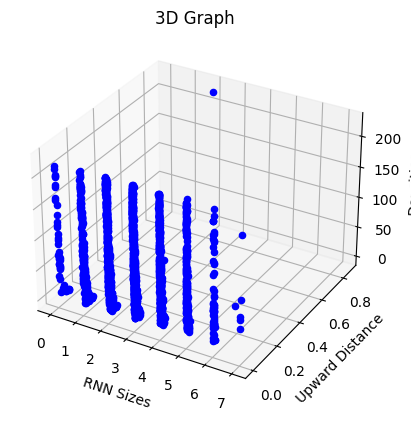

In [60]:
plot_decision_graph(df_gaussian)

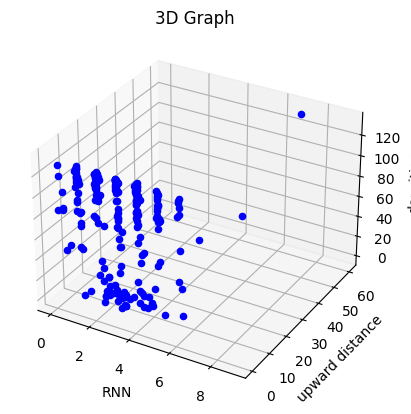

In [94]:
plot_decision_graph(df_thyroid)

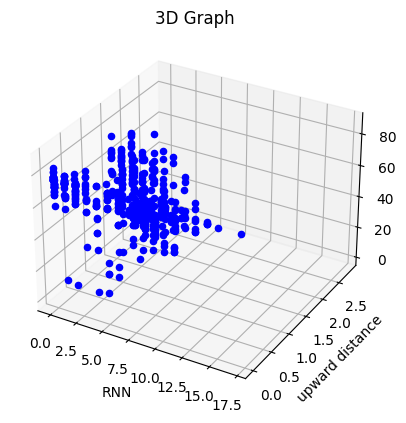

In [95]:
plot_decision_graph(df_vote)

### initialize subcluster

In [72]:
def subcluster_centers( upward_distances, noise_points):
    upward_distances_mean = np.mean(upward_distances)
    upward_distances_std = np.std(upward_distances)
    centers = []
    
    for i in range(len(upward_distances)):
        point_upward_distance = upward_distances[i]
        if (point_upward_distance > (upward_distances_mean + upward_distances_std)) and (i not in noise_points):
            centers.append(i)
    return centers


In [75]:
def Assign_remaining_points(dataset, c, densities, centers, distances):
    sorted_indices = np.argsort(densities)[::-1]
    
    for i in sorted_indices:
        if c[i] == -1:
            pi = densities[i]
            
            valid_indices = [idx for idx, density in enumerate(densities) if density > pi and c[idx] > 0]
            if len(valid_indices) > 0:
                distances_to_valid = [distances[i, idx] for idx in valid_indices]
                closest_cluster_index = valid_indices[np.argmin(distances_to_valid)]
                c[i] = c[closest_cluster_index]
            
    return c


In [78]:
def plot_2D(dataset,c,icc):
    colors_mapper = {cluster_num: (random.random(),random.random(),random.random()) for cluster_num in icc}
    colors = [colors_mapper[i] for i in c]
    plt.scatter(dataset[:,0], dataset[:,1], c=colors)
    plt.show()

### Algorithm 1. Initial Sub-Cluster Construction Algorithm

In [73]:
def initial_subcluster(dataset, k):
    dc = calc_threshold(dataset)
    local_densities, distance = calculate_local_density(dataset, dc)
    upward_distances = calculate_upward_distances(dataset, local_densities, distance, dc)
    reverse_nn_dict = calculate_reverse_nearest_neighbors(dataset, k)
    noise_points, c = detect_noise_point(dataset, upward_distances, local_densities, reverse_nn_dict)
    
    print(noise_points)

    if len(noise_points) > 0:
        print("that's ok :)")
        plt.scatter(dataset.iloc[noise_points, 0], dataset.iloc[noise_points, 1])
        plt.show()
    else:
        print("No noise points found.")

    centers = subcluster_centers( upward_distances, noise_points)
    
    for i in range(len(centers)):
        c[centers[i]] = i+1
     

    if len(centers) > 0:
        plt.scatter(dataset.iloc[centers, 0], dataset.iloc[centers, 1])
        plt.show()
    else:
        print("No sub-cluster centers found.")



    c = Assign_remaining_points(dataset, c, local_densities, centers, distance)
    icc = list(set(c))
    plot_2D(c,icc)

    return c, icc, centers, dc, local_densities


[3, 7, 121, 126, 154, 179, 198, 230, 241, 388, 421, 538, 650, 726, 785, 961, 962, 980, 1112, 1115, 1126, 1152, 1153, 1182, 1258, 1364, 1408, 1472, 1601, 1626, 1659, 1683, 1732, 1740, 1762, 1772, 1832, 1882]
that's ok :)


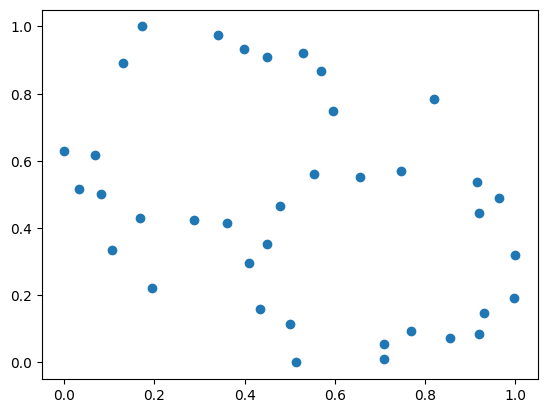

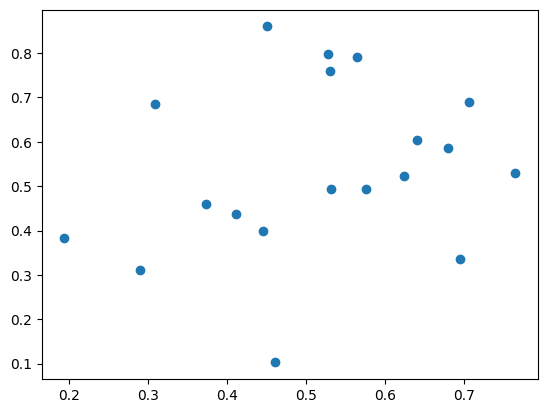

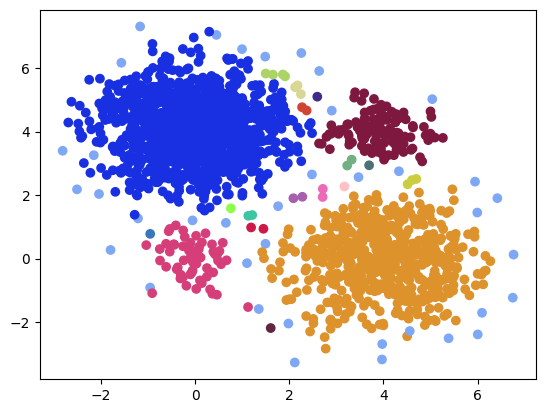

In [79]:
# Assuming you have a dataset and value for k
dataset = df_gaussian
k = 3

# Call the function with the dataset and k

cluster, icc , centers, dc, densities= initial_subcluster(dataset,4)

[157, 166, 169, 194, 207]


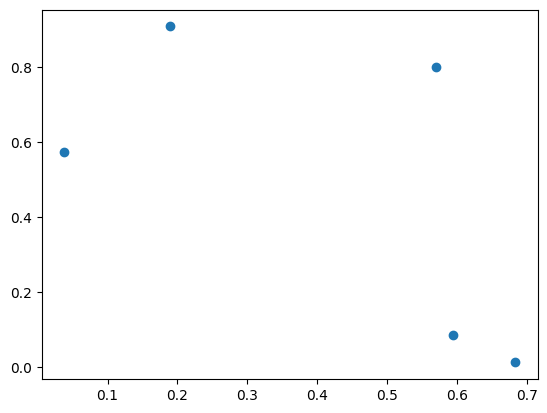

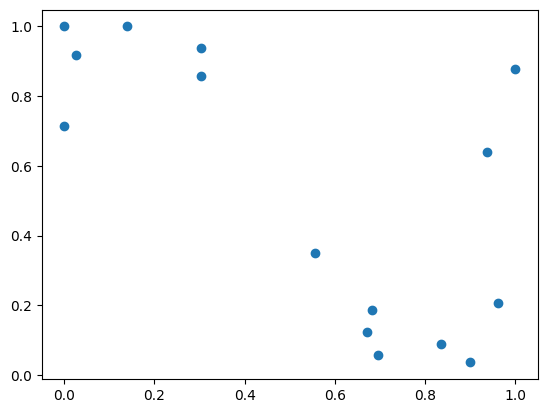

In [22]:
# Assuming you have a dataset and value for k
dataset_th = X_th
k = 3

# Call the function with the dataset and k

cluster_th, icc_th , centers_th, dc_th, densities_th= initial_subcluster(dataset_th,4)

[28, 54, 77, 117, 144, 147, 151, 168, 237, 246, 292, 316, 363, 385, 391, 393, 429]


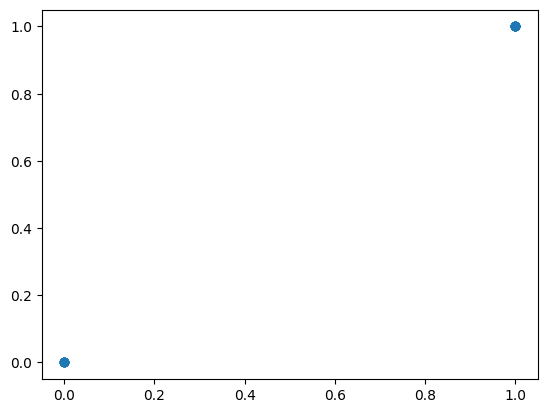

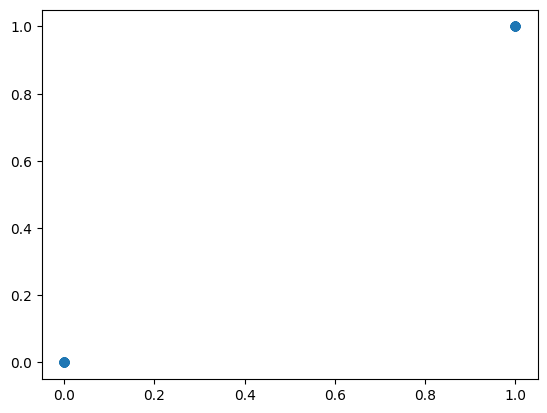

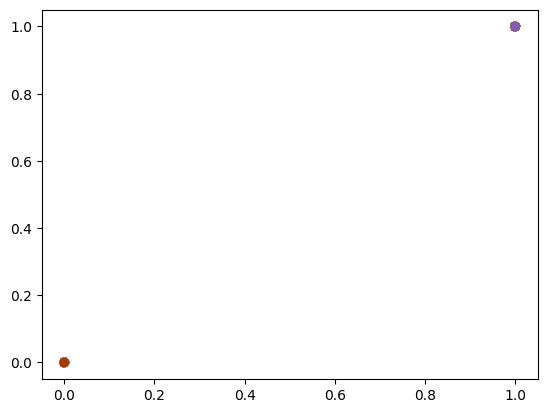

In [66]:
# Assuming you have a dataset and value for k
dataset_v = X_v

# Call the function with the dataset and k

cluster_v, icc_v , centers_v, dc_v, densities_v= initial_subcluster(dataset_v,4)

In [63]:

def delete_false(df, c, dc, centers, densities):
    distances = euclidean_distances(df)

    for i, center in enumerate(centers):
        n_i = np.sum(c == i + 1)
        neb = np.sum(distances[center] <= dc) - 1
        if n_i < 0.5 * neb:
            c[c == i + 1] = -1

    for i in np.where(c == -1)[0]:
        pi = densities[i]
        index = np.where((densities > pi) & (c > 0))[0]
        if index.size > 0:
            c[i] = c[index[np.argmin(distances[i, index])]]

    return c


### Algorithm 2: Sub-Cluster Updating Algorithm

In [64]:
def SubCluster_Update (dataset,c,dc,center,densities,icc):
    c = delete_false(dataset, c, dc, center,densities)
    # plot_2D(c,icc)
    return c

In [101]:
c = SubCluster_Update(df_gaussian, cluster,dc,centers,densities,icc)

In [44]:
unique_C= list(set(c))
unique_C

[0, 1, 2, 10, 14]

In [29]:
c_th = SubCluster_Update(X_th, cluster_th,dc_th,centers_th,densities_th,icc_th)

In [30]:
unique_C_th= list(set(c_th))
unique_C_th

[0, 1, 4, 5, 9, 11, 13, 14, 15]

In [67]:
c_v = SubCluster_Update(X_v, cluster_v,dc_v,centers_v,densities_v,icc_v)

In [68]:
unique_C_v= list(set(c_v))
unique_C_v

[0, -1, 39]

In [31]:
def boundary(c,densities ,i):
    claster_i = np.where(c==i)[0]
    avr = np.mean(densities[claster_i])
    boundery = [i for i in claster_i if densities[i] < avr ]
    return boundery


In [33]:
def find_cluster_to_merge(df, c, densities, centers):
    noise_points = np.where(c == 0)[0]
    if len(noise_points) == 0:
        r = dc
    else:
        r = calc_threshold(df.drop(index=noise_points))

    unique_clusters = np.unique(c)[1:]
    icc = len(unique_clusters)

    boundaries = {i: list() for i in unique_clusters}
    for i in unique_clusters:
        boundaries[i] = boundary(c, densities, i)

    merge_list = []
    for m in range(icc - 1):
        for n in range(m + 1, icc):
            cluster_m = unique_clusters[m]
            cluster_n = unique_clusters[n]

            c_m = np.where(c == cluster_m)[0]
            c_n = np.where(c == cluster_n)[0]

            d_m_n = pairwise_distances(df.iloc[c_m], df.iloc[c_n])
            dij = np.min(d_m_n)
            xi, xj = np.unravel_index(np.argmin(d_m_n), d_m_n.shape)

            if dij < r:
                if (c_m[xi] not in boundaries[cluster_m]) and (c_n[xj] not in boundaries[cluster_n]):
                    merge_list.append([cluster_m, cluster_n])
                elif densities[c_m[xi]] + densities[c_m[xi]] > 0.5 * (densities[centers[cluster_m - 1]] + densities[centers[cluster_n - 1]]):
                    merge_list.append([cluster_m, cluster_n])

    return merge_list


In [34]:
def merge_clusters(cluster_list):
    merged_clusters = cluster_list.copy()

    while True:
        merged = False
        i = 0

        while i < len(merged_clusters):
            j = i + 1

            while j < len(merged_clusters):
                if any(item in merged_clusters[i] for item in merged_clusters[j]):
                    merged_clusters[i].extend(merged_clusters[j])
                    merged_clusters[i] = list(set(merged_clusters[i]))
                    merged_clusters.pop(j)
                    merged = True
                else:
                    j += 1

            i += 1

        if not merged:
            break

    return merged_clusters

In [35]:
def assign_noise_to_cluster(df, c):
    noise_points = np.where(c == 0)[0]
    others = np.where(c != 0)[0]

    if len(noise_points) > 0:
        d = euclidean_distances(df.iloc[noise_points], df.iloc[others])

        for i in range(d.shape[0]):
            d_min = np.argmin(d[i])
            c[noise_points[i]] = c[others[d_min]]

    return c


### Algorithm 3: Sub-Cluster Merging Algorithm

In [36]:
def final_merge(df, c,densities, centers):
    merge_list= find_cluster_to_merge(df, c,densities, centers)
    print(merge_list)
    final_merge = merge_clusters(merge_list)
    
    for i in final_merge:
        for j in i[1:]:
            c[c==j]= i[0]
            

    c = assign_noise_to_cluster(df, c)
    return c
    
    

gaussian

In [110]:
mapped_clusters_guass = final_merge(df_gaussian, c, densities, centers)


[]


In [111]:
list(set(mapped_clusters_guass))


[1, 2, 10, 14]

In [116]:
mapping = {1: 2, 14: 3, 2: 1, 10: 3}

mapped_numbers_gauss = np.array([mapping[element] for element in mapped_clusters_guass])

In [147]:
list(set(mapped_clusters_guass))


[1, 2, 10, 14]

Thyroid

In [133]:
mapped_clusters_th = final_merge(X_th, c_th, densities_th, centers_th)


[]


In [134]:
list(set(mapped_clusters_th))

[1, 11, 4, 9]

In [138]:
mapping = {1: 1, 11: 2, 4: 3, 9: 9}

mapped_numbers_th = np.array([mapping[element] for element in mapped_clusters_th])

vote

In [136]:
mapped_clusters_v = final_merge(X_v, c_v, densities_v, centers_v)


[]


In [137]:
list(set(mapped_clusters_v))

[-1, 39]

In [139]:
mapping = {-1:0,39:1}

mapped_numbers_v = np.array([mapping[element] for element in mapped_clusters_v])

In [152]:
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, precision_score, recall_score, f1_score

def evaluate_clustering(true_labels, predicted_labels,ds):
    true_labels = true_labels.flatten()
    accuracy = accuracy_score(true_labels, predicted_labels)
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    print('Result for ',ds)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"NMI: {nmi:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


In [153]:
evaluate_clustering(y_gauss,mapped_numbers_gauss,'Gaussian')

Result for  Gaussian
Accuracy: 0.9300
NMI: 0.8392
Precision: 0.8807
Recall: 0.9300
F1-Score: 0.9029


c:\Users\ftmta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
evaluate_clustering(y_th,mapped_numbers_th , 'Thryoid')

Result for  Thryoid
Accuracy: 0.6977
NMI: 0.1722
Precision: 0.5105
Recall: 0.6977
F1-Score: 0.5896


c:\Users\ftmta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
y_v = np.array(y_v)
evaluate_clustering(y_v,mapped_numbers_v , 'Vote')

Result for  Vote
Accuracy: 0.5586
NMI: 0.0015
Precision: 0.5469
Recall: 0.5586
F1-Score: 0.5511
